In [3]:
import numpy as np
import pandas as pd
from scipy.stats import kstest,ttest_ind
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [4]:
efs_table = "/data5/deepro/ukbiobank/papers/bmi_project/4_characterization/protective/data/effect_sizes/all.csv"
efs_df = pd.read_csv(efs_table)

[Text(0, 0, 'Digenic\ncombinations'),
 Text(1, 0, 'Trigenic\ncombinations'),
 Text(2, 0, 'Akbari et. al.'),
 Text(3, 0, 'Turcot et. al.')]

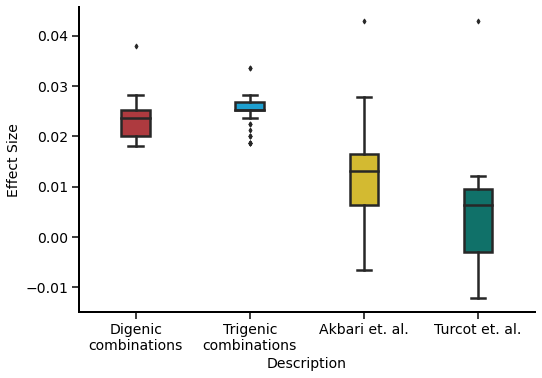

In [5]:
boxdf = efs_df

# # Define Canvas
# fig,ax = plt.subplots(1, 1, figsize=(8, 8))

# Box Plot
sns_ax = sns.catplot(
    data=boxdf,
    palette=["#c1272d", "#00ADEE", "#eecc16", "#008176"],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7"
    kind="box",
    x="Description",
    y="Effect Size",
    orient="v",
    aspect=1.5,
    width=0.25,
    linewidth=2.5,
    fliersize=3.5
    )


# Adjust Axis
# sns_ax.ax.set_yticks([-0.02, 0, 0.02, 0.04])
# sns_ax.ax.set_ylim((-0.025, 0.5))
# ax.set_ylabel('Percentage')
sns_ax.ax.set_xticklabels(["Digenic\ncombinations", "Trigenic\ncombinations", "Akbari et. al.", "Turcot et. al."],
    rotation=0)
# ax.set_ticklabels(
#     [],
#     rotation=90)

# # Remove Spines
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

In [6]:
digenic_effect_sizes = boxdf.loc[boxdf["Description"]=="Digenic combinations", "Effect Size"]
trigenic_effect_sizes = boxdf.loc[boxdf["Description"]=="Trigenic combinations", "Effect Size"]
akbari_effect_sizes = boxdf.loc[boxdf["Description"]=="Akbari et. al.", "Effect Size"]
turcot_effect_sizes = boxdf.loc[boxdf["Description"]=="Turcot et. al.", "Effect Size"]

In [7]:
ttest_ind(digenic_effect_sizes, akbari_effect_sizes, alternative="greater"), kstest(digenic_effect_sizes, akbari_effect_sizes)

(Ttest_indResult(statistic=3.1140306619078366, pvalue=0.0019763303161623334),
 KstestResult(statistic=0.8, pvalue=4.9135143684653215e-05))

In [8]:
ttest_ind(digenic_effect_sizes, turcot_effect_sizes, alternative="greater"), kstest(digenic_effect_sizes, turcot_effect_sizes)

(Ttest_indResult(statistic=4.158973053469578, pvalue=0.00013699517693096882),
 KstestResult(statistic=0.8571428571428571, pvalue=0.0001375380685727512))

In [9]:
ttest_ind(trigenic_effect_sizes, akbari_effect_sizes, alternative="greater"), kstest(trigenic_effect_sizes, akbari_effect_sizes)

(Ttest_indResult(statistic=7.294084066245243, pvalue=3.6170968831862396e-11),
 KstestResult(statistic=0.8, pvalue=1.570305634523983e-06))

In [10]:
ttest_ind(trigenic_effect_sizes, turcot_effect_sizes, alternative="greater"), kstest(trigenic_effect_sizes, turcot_effect_sizes)

(Ttest_indResult(statistic=9.198587299134543, pvalue=3.606204307235232e-15),
 KstestResult(statistic=0.8571428571428571, pvalue=1.0425046762629897e-05))

In [11]:
all_combo_effect_sizes = pd.concat((digenic_effect_sizes, trigenic_effect_sizes))
published_studies_effect_sizes = pd.concat((akbari_effect_sizes, turcot_effect_sizes))

In [12]:
ttest_ind(all_combo_effect_sizes, published_studies_effect_sizes, alternative="greater"), kstest(all_combo_effect_sizes, published_studies_effect_sizes)

(Ttest_indResult(statistic=8.803730339353377, pvalue=3.556032955051476e-15),
 KstestResult(statistic=0.8235294117647058, pvalue=4.212186155427844e-11))